# Import Libraries
#### Let's import libraries to get started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# The Data
#### Let's start by reading in the titanic_train.csv file into a pandas dataframe

In [2]:
#Read the titanic dataset
df = pd.read_csv('D:/INSTALLED_APP/AI/Dataset/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Aalysis
#### Let's begin some exploratory dta analysis . We'll start by checking out missing data

# Missing Data
#### We can use seaborn to create a simple heatmap to see where we are missing data

In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

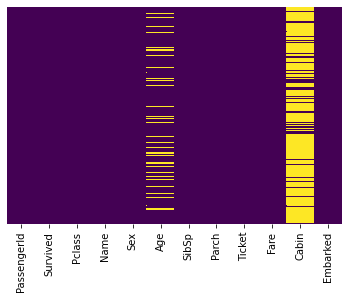

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# whatever condition we put & if it is true then it is colored in different color
# in our case if data is missing then it is true

#### Roughly 20% of the Age data is missing. THe proportion of Age missing is likely small enough for reasonable replacement with some form of imputaion. Looking at the cabin column it looks like wwe are just missing too much of that data to do something useful with at a basic level. We'll prbably drop this later, or changge it to another feature like "Cabin known: 1 or 0"

#### Let's continue on by visualizing some more of the data. Check out the video for full explanations over these plots. this code just to serve as reference

<AxesSubplot:xlabel='Survived', ylabel='count'>

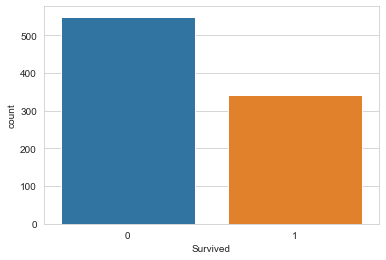

In [6]:
sns.set_style('whitegrid') # whitegrid style shows a white box to analyse
sns.countplot(x='Survived', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

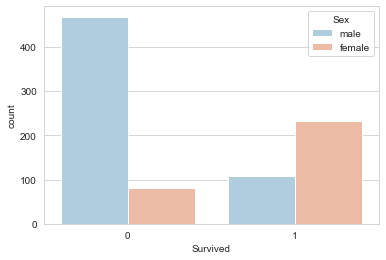

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r')
# from the observation we found that max male died(almost 480) and max female survived(almost 220)

<AxesSubplot:xlabel='Survived', ylabel='count'>

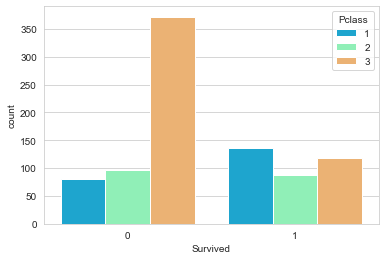

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=df, palette='rainbow')
# from data it is seen that 3rd class died most, then 2nd class then 1st class
# in survived 1st class survived the most, then 3rd class, then 2nd class

<AxesSubplot:>

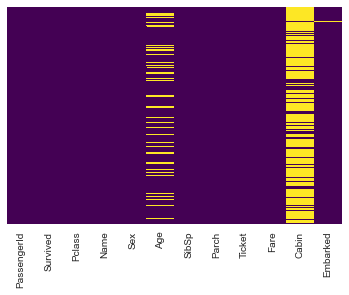

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Age'>

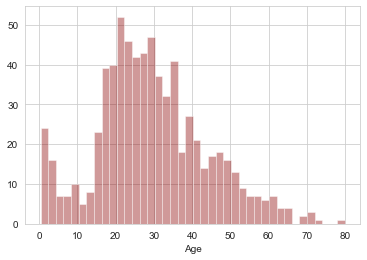

In [10]:
# again we want to see the distribution of the people in the TITANIC
# so that we can visualize max people are from which age group
sns.distplot(df['Age'].dropna(), kde=False, color='darkred', bins=40)
# dropna() to drop the rows with null value. as we have seen that 20% of age data are missing
# kde=False, bcz we don't want the karnel density

<AxesSubplot:>

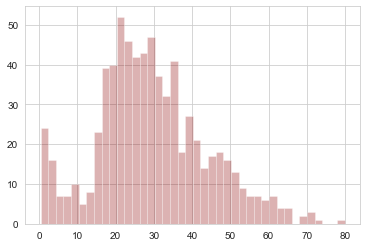

In [11]:
# using matplotlib
df['Age'].hist(bins=40, color='darkred', alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

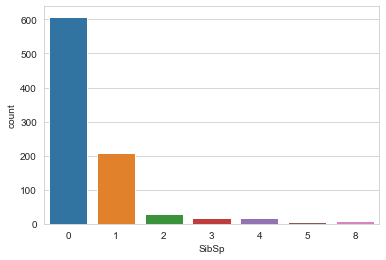

In [12]:
# count the sibling & spouce
sns.countplot(x='SibSp', data=df)

<AxesSubplot:>

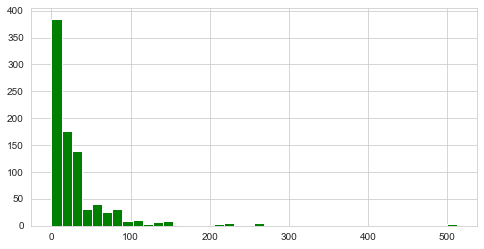

In [13]:
df['Fare'].hist(color='green', bins=40, figsize=(8,4))
#figsize if the size of the graph

# Data Cleaning
#### We want to fill in missing age data instead just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passangers(imputation). However we can be smarter about this and check the average age by passenger class. For example

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

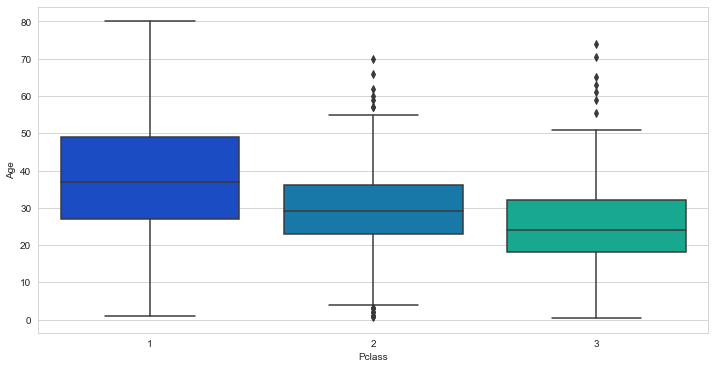

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

#### we can see the weathier passengers in the higher classes tend to be older. Which makes sense. We'll use these average age values to impute based on Pclass for Age

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: return 24
    else:
        return Age

#### Now apply that function

In [16]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)
# whenever we apply on the column 'Age' & 'Pclass' then for each entry (each column) impute age function is going to run

#### Now let's check that heat map again

<AxesSubplot:>

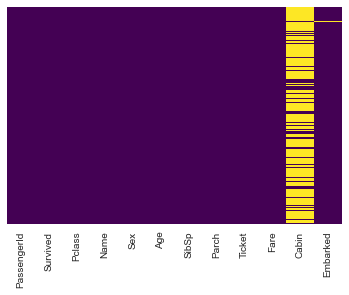

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# now we have seen that all the null values has been filled.

#### Let's go ahead and drop Cabin column and the row in Embarked that is Nan

In [18]:
df.drop('Cabin', axis=1, inplace=True)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
df.dropna(inplace=True)

<AxesSubplot:>

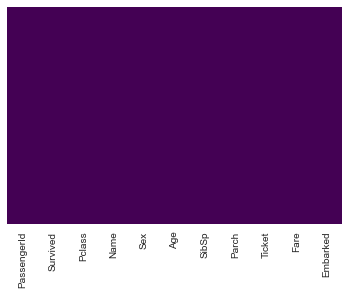

In [21]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# after all the steps there is no row/column exists which have some null values

# Converting Categoriacal Features
#### We'll need to convert categorical features to dummy variables using pandas. Otherwise our maxhine learning algorithm won't be able to directly take those features as inputs.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [23]:
pd.get_dummies(df['Embarked'], drop_first=True).head()
# get dummies converts the rows into that many categoris (eg male & female are in the same column so it'll create 
# 2 columns instead of one and all rows having male will have 1 in male column & all rows having female will have
# 1 female column)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [25]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
# drop all the unnecessary columns and also those that we have created dummies

In [26]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [27]:
# Now we have to append the dummies we have created 
df = pd.concat([df, sex, embark], axis=1)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


#### Great our data is ready for our model

# Building a Logistic Regression model
#### Let's start by splitting our data into training and tes set (there is another test csv file that you can play around with in case you want to use all this data for training)
### Train Test Split

In [29]:
df.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [30]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1),
                                                    df['Survived'], test_size = 0.3,
                                                    random_state=101
                                                   )
# here first param is x column and second is y column

# Training and Predicting

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

C:\Users\arunn\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
prediction = logmodel.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrixion_matrix

In [39]:
acuracy = confusion_matrix(y_test, prediction)

In [40]:
acuracy

array([[149,  14],
       [ 39,  65]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy = accuracy_score(y_test, prediction)
accuracy

0.8014981273408239

In [44]:
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)